In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1. Исправьте код применения оператора Собеля, который мы писали на занятии, таким образом, чтобы оператор применялся по обоим направлениям (x и y).

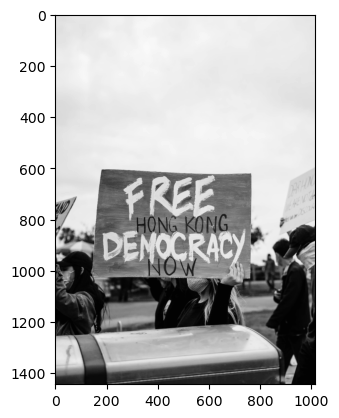

In [6]:
img = cv2.imread("D:\project/3_S_M_CV2\DZ6\hong.png", 0)
plt.imshow(img, cmap="gray")

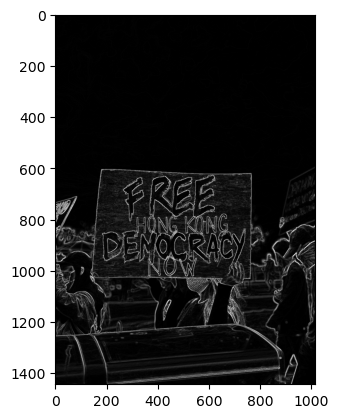

In [7]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)


grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
plt.imshow(grad, cmap="gray")

2. На занятии мы попробовали несколько фильтров различного назначения (это размытие, устранение шумов, выделение границ и тд). Каждый алгоритм, осуществляющий фильтрацию изображения, обычно имеет несколько параметров, влияющих на результат (размер ядра и тд). И для того, чтобы понять, какое именно влияние оказывают каждый из параметров или их комбинация, может потребоваться перезапустить код много раз с разными значениями параметров, что не удобно. Поэтому в этом задании вам предлагается создать оконное приложение, отображающее результат применения того или иного фильтра (можете выбрать любой, например, Canny), интерфейс (кнопки, чек-боксы, ползунки и тд), позволяющий варьировать значения параметров фильтра и смотреть, как это влияет на результат в реальном времени (обновляя выводимое изображение). Пример реализации такого интерфейса на OpenCV можно найти здесь: https://docs.opencv.org/4.x/d9/dc8/tutorial_py_trackbar.html

3. К изображению hong.png из папки необходимо подобрать такую морфологическую операцию, чтобы устранить с таблички слова, написанные черным цветом

In [1]:
import cv2

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

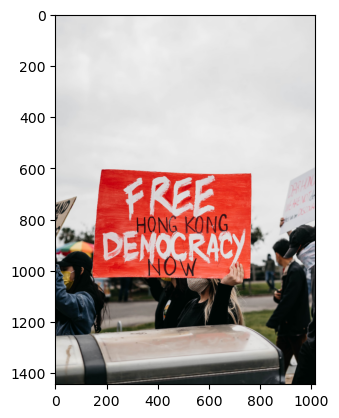

In [2]:
image = cv2.imread("./hong.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [8]:
img=image[600:1025,200:700]
plt.imshow(img)

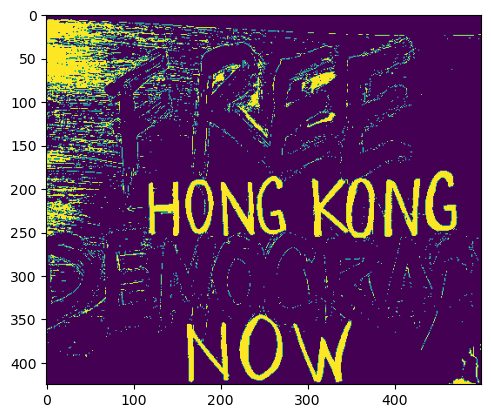

In [76]:
mi = 210
def black_there(img,mi):
    black_1 = img[:, :, 0] < mi
    black_2 = img[:, :, 1] < mi
    black_3 = img[:, :, 2] < mi
    black = black_3 * black_2 * black_1
    return black
black=black_there(img,mi)
plt.imshow(black)

27340


C:\Users\Павел\AppData\Local\Temp\ipykernel_19236\1173173803.py:17: RuntimeWarning: invalid value encountered in floor_divide
  sred=sred//n


9859
4385
1378
503
225
92
27
5
0


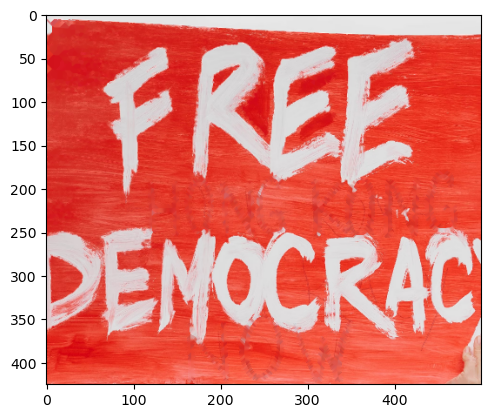

In [74]:
not_black = np.copy(img)
black=np.array([True])
while black.any():
    black=black_there(not_black,mi)
    print(np.count_nonzero(black))
    for y in range(not_black.shape[0]):
        for x in range(not_black.shape[1]):
            if black[y,x]:
                # тупой вариант
                sred=np.zeros(3)
                n=0
                for a in range(9):
                    if a!=4 and (y-1+a/3)<not_black.shape[0] and (x-1+a%3)<not_black.shape[1] and not black[int(y-1+a/3),int(x-1+a%3)]:
                        # print(sred,not_black[int(y-1+a/3)][int(x-1+a%3)],type(sred+not_black[int(y-1+a/3),int(x-1+a%3)]))
                        sred=sred+not_black[int(y-1+a/3),int(x-1+a%3)]
                        n=n+1
                sred=sred//n
                if n:
                    not_black[y][x]=sred
plt.imshow(not_black)

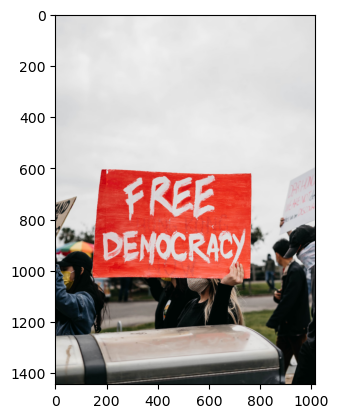

In [77]:
image[600:1025,200:700]=not_black
plt.imshow(image)